# Problem Statement:- In this dataset we have 10 independent variables and 1 dependent variable ("Price").This is the problem of regression.

# Importing Important libraries of python.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the test dataset & training dataset.

In [133]:
df_test=pd.read_excel("flight_test.xlsx")
df_train=pd.read_excel("flight_train.xlsx")

In [134]:
#Lets see the training dataset.
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [135]:
#Lets check the shape of the dataset
df_train.shape

(10683, 11)

Training dataset has 10683 rows and 11 columns

In [136]:
#Lets check the names of the column in the training dataset.
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [137]:
df_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [138]:
df_train["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [139]:
df_train["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [140]:
df_train["Route"].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → HBX → BOM → NAG → DEL       1
BLR → HBX → BOM → BHO → DEL       1
CCU → IXA → BLR                   1
BLR → BOM → IXC → DEL             1
BOM → JDH → JAI → DEL → HYD       1
Name: Route, Length: 128, dtype: int64

In [141]:
df_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [142]:
df_train["Additional_Info"].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

# Lets do some Exploratory Data Analysis on our training dataset.

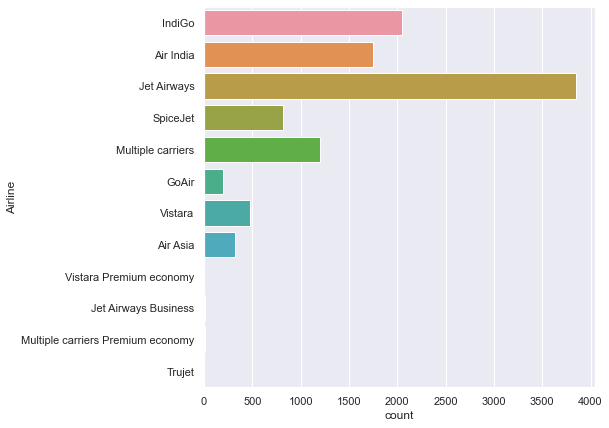

In [143]:
#Lets check the counts of different Airline category in our dataset.
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Airline", data=df_train)

We can see that most of the used airlines by passengers are "Jet Airways" ,"Indigo" & "Air India".

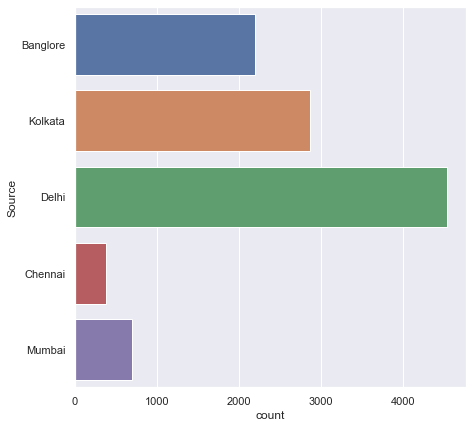

In [144]:
#Lets check the counts of different Source category in our dataset.
sns.set(rc={'figure.figsize':(7,7)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Source", data=df_train)

We can see that most of flight are from "Delhi" ,"Kolkata" & "Bangalore".

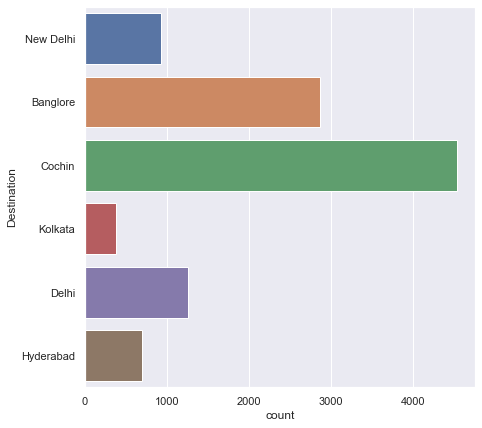

In [145]:
#Lets check the counts of different Destination category in our dataset.
sns.set(rc={'figure.figsize':(7,7)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Destination", data=df_train)

Most of the flights are going to "Cochin" & "Bangalore".

In [146]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [147]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [148]:
#Let us convert Date from object datatype to datetime64 Datatype
df_train["Date_of_Journey"]=pd.to_datetime(df_train["Date_of_Journey"])

In [149]:
#We are creating two new columns of Year and Month by extracting data from Date column
df_train['Year'] = pd.DatetimeIndex(df_train['Date_of_Journey']).year
df_train['Month'] = pd.DatetimeIndex(df_train['Date_of_Journey']).month

In [150]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1


In [151]:
#Lets drop the column of Date_of_journey and Route.
df_train=df_train.drop(['Date_of_Journey'], axis = 1)
df_train=df_train.drop(['Route'], axis = 1)
df_train=df_train.drop(['Additional_Info'], axis = 1)


In [152]:
df_train

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Year,Month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,2019,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,2019,1
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,2019,9
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,2019,12
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,2019,1
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,2019,9
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,2019,4
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,2019,4
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,2019,1


In [153]:
df_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [154]:
df_train["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
27h 55m      1
42h 45m      1
35h 20m      1
47h          1
30h 10m      1
Name: Duration, Length: 368, dtype: int64

In [155]:
#Lets write a code which will convert the Duration time in minutes.
#Creating a empty list time in which we will store the the value of time both in hours and minutes.
time=[]
for i in df_train["Duration"]:
    x=i.split(" ")
    time.append(x)
    
#Lets create another two empty lists hours and minutes in which we will store the time in hours and in minute.
    
hours=[]
minutes=[]
for i in time:
    if len(i)==2:
        minutes.append(i[1])
    else:
        minutes.append("")
        
        
    hours.append(i[0])
    
#Create another empty lists in which we will store the time in integer.    
num_minute=[]
for i in minutes:
    if len(i)>1:
        num_minute.append(i[0:-1])
    else:
        num_minute.append(" ")
        
num_hours=[]
for i in hours:
   num_hours.append(i[0:-1])

#Lets convert the hours into minutes
hourss=[]
for i in num_hours:
    hourss.append(int(i)*60)
    
minutess=[]
for i in num_minute:
    if len(i)>1:
        minutess.append(int(i))
    else:
        minutess.append(0)
#Lets add time from both minutes and hours and convert it into minutes in empty list "total_time" .       
total_time=[]
for i in range(0, len(minutess)):
    total_time.append(minutess[i] + hourss[i])
  

In [156]:
total_time

[170,
 445,
 1140,
 325,
 285,
 145,
 930,
 1260,
 1530,
 470,
 795,
 155,
 135,
 730,
 155,
 1595,
 270,
 1355,
 1380,
 1235,
 310,
 920,
 170,
 175,
 800,
 910,
 345,
 355,
 170,
 135,
 135,
 805,
 170,
 1320,
 330,
 625,
 315,
 150,
 375,
 715,
 660,
 510,
 1320,
 165,
 720,
 170,
 170,
 135,
 960,
 1195,
 195,
 1520,
 170,
 180,
 170,
 975,
 900,
 135,
 390,
 1500,
 745,
 1640,
 615,
 630,
 135,
 625,
 170,
 90,
 800,
 135,
 85,
 1590,
 440,
 810,
 300,
 165,
 170,
 90,
 1140,
 135,
 890,
 160,
 1330,
 575,
 600,
 1280,
 325,
 1125,
 740,
 1080,
 555,
 660,
 1050,
 800,
 155,
 145,
 160,
 180,
 85,
 995,
 740,
 735,
 450,
 1440,
 165,
 535,
 430,
 870,
 1820,
 1195,
 900,
 175,
 765,
 610,
 355,
 925,
 960,
 610,
 160,
 715,
 160,
 85,
 840,
 1215,
 145,
 1390,
 1090,
 960,
 170,
 140,
 480,
 1015,
 190,
 165,
 840,
 1430,
 1300,
 1275,
 165,
 650,
 480,
 495,
 325,
 515,
 710,
 1655,
 505,
 1255,
 290,
 490,
 140,
 1465,
 170,
 740,
 735,
 1415,
 995,
 170,
 1545,
 1570,
 1730,
 1

In [157]:
len(total_time)

10683

In [158]:
df_time = pd.DataFrame(total_time,columns=["Total_Journey_Duration"])

In [159]:
#Adding both the dataframes together. 
df_tr = pd.concat((df_train, df_time), axis=1)


In [160]:
df_tr

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Year,Month,Total_Journey_Duration
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,2019,3,170
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,2019,1,445
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,2019,9,1140
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,2019,12,325
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,2019,1,285
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,2019,9,150
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,2019,4,155
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,2019,4,180
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,2019,1,160


In [161]:
#Lets delete the column whose name is "Duration" because it is of no use for us,since we have already created "Total_Journey_Duration".
df_tr=df_tr.drop(['Duration'], axis = 1)

In [162]:
df_tr

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Year,Month,Total_Journey_Duration
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,3897,2019,3,170
1,Air India,Kolkata,Banglore,05:50,13:15,2 stops,7662,2019,1,445
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,13882,2019,9,1140
3,IndiGo,Kolkata,Banglore,18:05,23:30,1 stop,6218,2019,12,325
4,IndiGo,Banglore,New Delhi,16:50,21:35,1 stop,13302,2019,1,285
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,non-stop,4107,2019,9,150
10679,Air India,Kolkata,Banglore,20:45,23:20,non-stop,4145,2019,4,155
10680,Jet Airways,Banglore,Delhi,08:20,11:20,non-stop,7229,2019,4,180
10681,Vistara,Banglore,New Delhi,11:30,14:10,non-stop,12648,2019,1,160


In [163]:
#Checking for the null values in the dataframe.
df_tr.isnull().sum()

Airline                   0
Source                    0
Destination               0
Dep_Time                  0
Arrival_Time              0
Total_Stops               1
Price                     0
Year                      0
Month                     0
Total_Journey_Duration    0
dtype: int64

We can see that we have only 1 null value present in the "Total_Stops".

In [164]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 10683 non-null  object
 1   Source                  10683 non-null  object
 2   Destination             10683 non-null  object
 3   Dep_Time                10683 non-null  object
 4   Arrival_Time            10683 non-null  object
 5   Total_Stops             10682 non-null  object
 6   Price                   10683 non-null  int64 
 7   Year                    10683 non-null  int64 
 8   Month                   10683 non-null  int64 
 9   Total_Journey_Duration  10683 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 834.7+ KB


In [165]:
#Lets extract the information of arrival time hour,min in integer form.
df_tr['Arrival_Hour'] = df_tr['Arrival_Time'].str.split(':').str[0]
df_tr['Arrival_Minute'] = df_tr['Arrival_Time'].str.split(':').str[1]
df_tr['Arrival_Hour']=df_tr['Arrival_Hour'].astype(int)
df_tr['Arrival_Minute']=df_tr['Arrival_Minute']
df_tr=df_tr.drop(['Arrival_Time'],axis=1)

In [166]:
df_tr

,Airline,Source,Destination,Dep_Time,Total_Stops,Price,Year,Month,Total_Journey_Duration,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,22:20,non-stop,3897,2019,3,170,1,10 22 Mar
1,Air India,Kolkata,Banglore,05:50,2 stops,7662,2019,1,445,13,15
2,Jet Airways,Delhi,Cochin,09:25,2 stops,13882,2019,9,1140,4,25 10 Jun
3,IndiGo,Kolkata,Banglore,18:05,1 stop,6218,2019,12,325,23,30
4,IndiGo,Banglore,New Delhi,16:50,1 stop,13302,2019,1,285,21,35
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,non-stop,4107,2019,9,150,22,25
10679,Air India,Kolkata,Banglore,20:45,non-stop,4145,2019,4,155,23,20
10680,Jet Airways,Banglore,Delhi,08:20,non-stop,7229,2019,4,180,11,20
10681,Vistara,Banglore,New Delhi,11:30,non-stop,12648,2019,1,160,14,10


In [167]:
df_tr["Arrival_Minute"][0].split(" ")[0]

'10'

In [168]:
Arrivals_Minute=[]
for i in df_tr["Arrival_Minute"]:
   Arrivals_Minute.append(i.split(" ")[0])
    

In [169]:
Arrivals_Minute

['10',
 '15',
 '25',
 '30',
 '35',
 '25',
 '25',
 '05',
 '25',
 '15',
 '00',
 '55',
 '55',
 '20',
 '50',
 '15',
 '15',
 '35',
 '15',
 '35',
 '20',
 '20',
 '50',
 '50',
 '15',
 '35',
 '35',
 '55',
 '35',
 '20',
 '20',
 '15',
 '50',
 '35',
 '35',
 '00',
 '20',
 '45',
 '15',
 '00',
 '10',
 '15',
 '00',
 '55',
 '00',
 '35',
 '50',
 '55',
 '05',
 '00',
 '15',
 '55',
 '10',
 '15',
 '45',
 '00',
 '55',
 '20',
 '30',
 '45',
 '50',
 '25',
 '00',
 '30',
 '20',
 '00',
 '35',
 '25',
 '15',
 '35',
 '30',
 '15',
 '00',
 '35',
 '05',
 '35',
 '30',
 '55',
 '35',
 '35',
 '00',
 '35',
 '40',
 '00',
 '00',
 '25',
 '25',
 '25',
 '45',
 '25',
 '30',
 '20',
 '25',
 '15',
 '20',
 '40',
 '35',
 '50',
 '30',
 '35',
 '45',
 '15',
 '25',
 '35',
 '55',
 '25',
 '50',
 '15',
 '15',
 '00',
 '05',
 '50',
 '05',
 '25',
 '55',
 '30',
 '25',
 '35',
 '40',
 '00',
 '35',
 '25',
 '05',
 '15',
 '40',
 '10',
 '15',
 '00',
 '50',
 '05',
 '50',
 '25',
 '50',
 '10',
 '30',
 '00',
 '25',
 '15',
 '45',
 '50',
 '30',
 '45',
 '25',

In [170]:
df_arrmin = pd.DataFrame(Arrivals_Minute,columns=["Arrivals_Minute"])


In [171]:
df_tr = pd.concat((df_arrmin, df_tr), axis=1)
df_tr=df_tr.drop(['Arrival_Minute'], axis = 1)
df_tr['Arrivals_Minute']=df_tr['Arrivals_Minute'].astype(int)

In [172]:
df_tr

,Arrivals_Minute,Airline,Source,Destination,Dep_Time,Total_Stops,Price,Year,Month,Total_Journey_Duration,Arrival_Hour
0,10,IndiGo,Banglore,New Delhi,22:20,non-stop,3897,2019,3,170,1
1,15,Air India,Kolkata,Banglore,05:50,2 stops,7662,2019,1,445,13
2,25,Jet Airways,Delhi,Cochin,09:25,2 stops,13882,2019,9,1140,4
3,30,IndiGo,Kolkata,Banglore,18:05,1 stop,6218,2019,12,325,23
4,35,IndiGo,Banglore,New Delhi,16:50,1 stop,13302,2019,1,285,21
...,...,...,...,...,...,...,...,...,...,...,...
10678,25,Air Asia,Kolkata,Banglore,19:55,non-stop,4107,2019,9,150,22
10679,20,Air India,Kolkata,Banglore,20:45,non-stop,4145,2019,4,155,23
10680,20,Jet Airways,Banglore,Delhi,08:20,non-stop,7229,2019,4,180,11
10681,10,Vistara,Banglore,New Delhi,11:30,non-stop,12648,2019,1,160,14


In [173]:
#Lets extract the information of Departure time hour,min in integer form.
df_tr['Departure_Hour'] = df_tr['Dep_Time'].str.split(':').str[0]
df_tr['Departure_Minute'] = df_tr['Dep_Time'].str.split(':').str[1]
df_tr['Departure_Hour']=df_tr['Departure_Hour'].astype(int)
df_tr['Departure_Minute']=df_tr['Departure_Minute'].astype(int)
df_tr=df_tr.drop(['Dep_Time'],axis=1)

In [174]:
df_tr

,Arrivals_Minute,Airline,Source,Destination,Total_Stops,Price,Year,Month,Total_Journey_Duration,Arrival_Hour,Departure_Hour,Departure_Minute
0,10,IndiGo,Banglore,New Delhi,non-stop,3897,2019,3,170,1,22,20
1,15,Air India,Kolkata,Banglore,2 stops,7662,2019,1,445,13,5,50
2,25,Jet Airways,Delhi,Cochin,2 stops,13882,2019,9,1140,4,9,25
3,30,IndiGo,Kolkata,Banglore,1 stop,6218,2019,12,325,23,18,5
4,35,IndiGo,Banglore,New Delhi,1 stop,13302,2019,1,285,21,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,25,Air Asia,Kolkata,Banglore,non-stop,4107,2019,9,150,22,19,55
10679,20,Air India,Kolkata,Banglore,non-stop,4145,2019,4,155,23,20,45
10680,20,Jet Airways,Banglore,Delhi,non-stop,7229,2019,4,180,11,8,20
10681,10,Vistara,Banglore,New Delhi,non-stop,12648,2019,1,160,14,11,30


In [175]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Arrivals_Minute         10683 non-null  int32 
 1   Airline                 10683 non-null  object
 2   Source                  10683 non-null  object
 3   Destination             10683 non-null  object
 4   Total_Stops             10682 non-null  object
 5   Price                   10683 non-null  int64 
 6   Year                    10683 non-null  int64 
 7   Month                   10683 non-null  int64 
 8   Total_Journey_Duration  10683 non-null  int64 
 9   Arrival_Hour            10683 non-null  int32 
 10  Departure_Hour          10683 non-null  int32 
 11  Departure_Minute        10683 non-null  int32 
dtypes: int32(4), int64(4), object(4)
memory usage: 834.7+ KB


In [176]:
totalstops=df_tr.iloc[:,4].to_numpy()
totalstops=totalstops.reshape(-1,1)

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(totalstops)
df_tr.iloc[:,4]=imp.transform(totalstops)


In [177]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Arrivals_Minute         10683 non-null  int32 
 1   Airline                 10683 non-null  object
 2   Source                  10683 non-null  object
 3   Destination             10683 non-null  object
 4   Total_Stops             10683 non-null  object
 5   Price                   10683 non-null  int64 
 6   Year                    10683 non-null  int64 
 7   Month                   10683 non-null  int64 
 8   Total_Journey_Duration  10683 non-null  int64 
 9   Arrival_Hour            10683 non-null  int32 
 10  Departure_Hour          10683 non-null  int32 
 11  Departure_Minute        10683 non-null  int32 
dtypes: int32(4), int64(4), object(4)
memory usage: 834.7+ KB


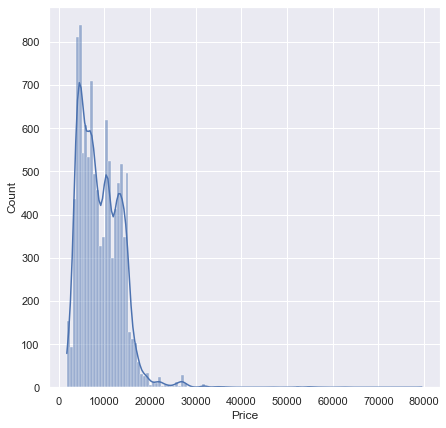

In [178]:
#Lets plot the Price distribution curve.  
sns.histplot(data=df_tr, x="Price", kde=True)

We can see from the distribution curve of "Price" that it is heavily skewed to the right.

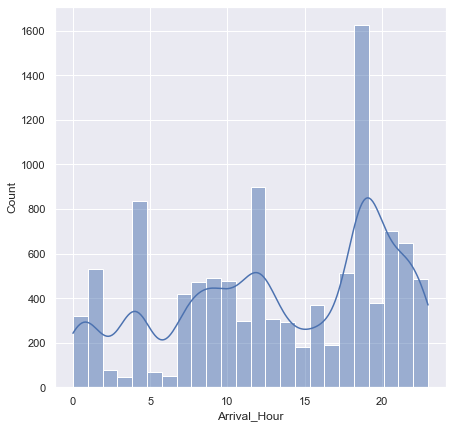

In [179]:
#Lets plot the Arrival_Hour  distribution curve.  
sns.histplot(data=df_tr, x="Arrival_Hour", kde=True)

From the distribution curve we can say that Arrival_Hour is somewhat negatively skewed (very less skewed).

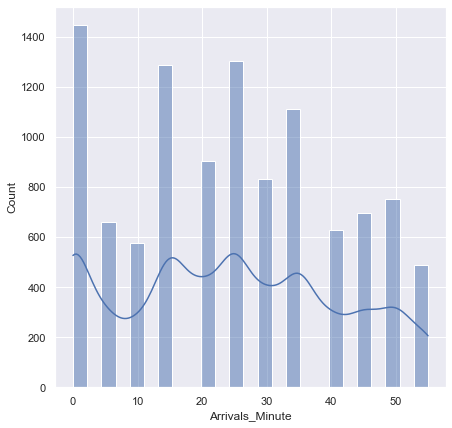

In [180]:
#Lets plot the Arrivals_Minute  distribution curve.  
sns.histplot(data=df_tr, x="Arrivals_Minute", kde=True)

From the distribution curve of Arrivals_Minute we can say that "Arrivals_Minute" is somewhat positively skewed (very less skewed).

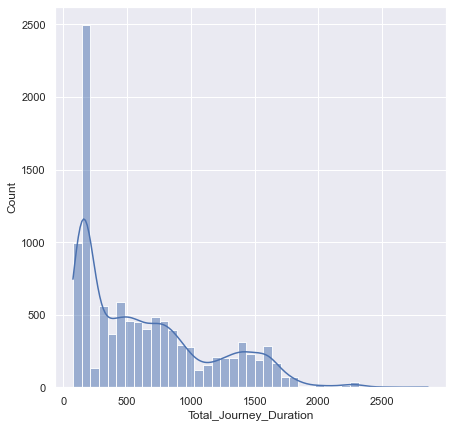

In [181]:
#Lets plot the Total_Journey_Duration  distribution curve.  
sns.histplot(data=df_tr, x="Total_Journey_Duration", kde=True)

We can see that total journey duration is heavily skewed to the right side.

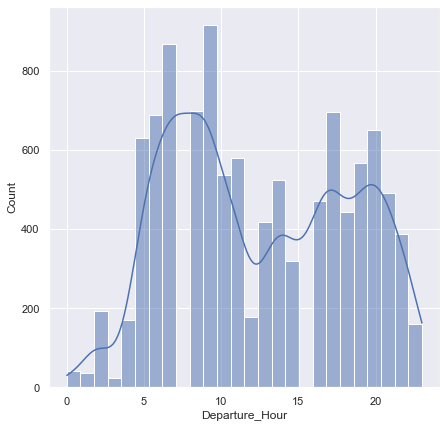

In [182]:
#Lets plot the Departure_Hour distribution curve.  
sns.histplot(data=df_tr, x="Departure_Hour", kde=True)

We can see that "Departure_Hour" is very lightly skewed to the right side.

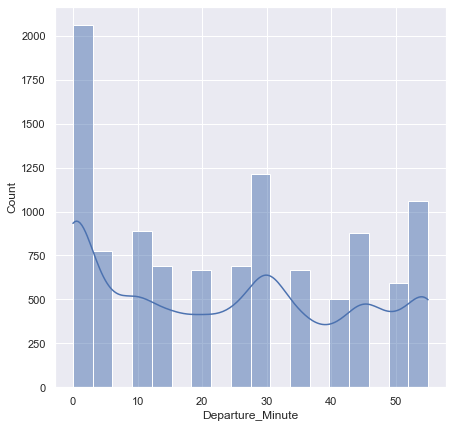

In [183]:
#Lets plot the Departure_Minute distribution curve.  
sns.histplot(data=df_tr, x="Departure_Minute", kde=True)

"Departure_Minute" is very lightly skewed to the right side.

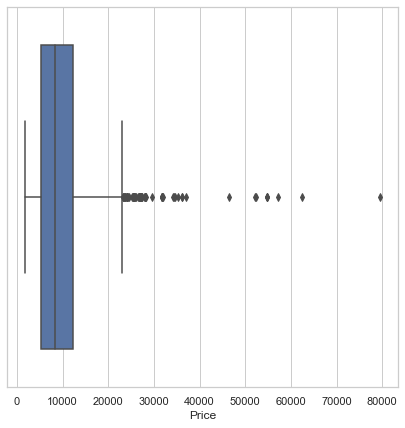

In [184]:
#lets deal with outliers in our dataset.
#Checking for the outliers by means of boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_tr["Price"])

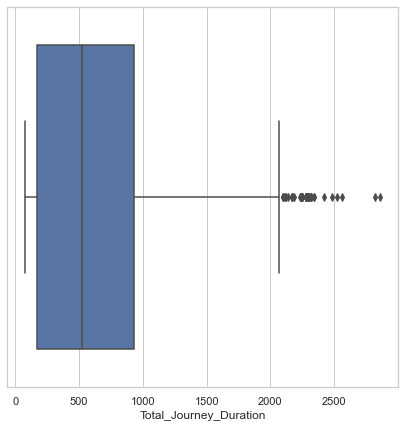

In [185]:
#Checking for the outliers by means of boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_tr["Total_Journey_Duration"])

We can see that both features "Total_Journey_Duration" and "Price" both has many outliers within them.

In [186]:
#Defining a function which return the list of indices where outliers are present.
def outliers(dataframe,feature):
    Q1=dataframe[feature].quantile(0.25)
    Q3=dataframe[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    ls=dataframe.index[(dataframe[feature]<lower_bound) | (dataframe[feature]>upper_bound)]
    return ls

In [187]:
#Create an empty list to store the output indices from the multiple columns.

index_list=[]
for feature in ["Price","Total_Journey_Duration"]:
    index_list.extend(outliers(df_tr,feature))

In [188]:
#Showing the index of those rows which have outliers.
index_list

[123,
 396,
 486,
 510,
 597,
 628,
 657,
 785,
 826,
 936,
 946,
 959,
 975,
 1196,
 1246,
 1341,
 1424,
 1466,
 1478,
 1629,
 1654,
 1785,
 1918,
 2055,
 2099,
 2108,
 2495,
 2556,
 2618,
 2635,
 2693,
 2924,
 3032,
 3111,
 3257,
 3400,
 3535,
 3700,
 4012,
 4521,
 4829,
 5013,
 5136,
 5372,
 5439,
 5662,
 5701,
 5710,
 5719,
 5738,
 5745,
 5856,
 5986,
 6314,
 6407,
 6576,
 6588,
 6605,
 6991,
 7351,
 7356,
 7377,
 7537,
 7554,
 7617,
 7713,
 7724,
 7756,
 7902,
 8020,
 8080,
 8451,
 8470,
 8536,
 8598,
 8940,
 8957,
 8990,
 9019,
 9193,
 9239,
 9632,
 9715,
 9974,
 10052,
 10113,
 10160,
 10182,
 10189,
 10353,
 10364,
 10383,
 10439,
 10511,
 226,
 553,
 919,
 925,
 966,
 969,
 991,
 1067,
 1113,
 1318,
 1346,
 1442,
 1496,
 1551,
 1657,
 1791,
 1804,
 2172,
 2553,
 2641,
 2654,
 2718,
 3457,
 3496,
 3790,
 3815,
 3966,
 4047,
 4118,
 4463,
 4655,
 4785,
 5516,
 5701,
 5711,
 5782,
 5933,
 5953,
 6059,
 6085,
 6321,
 6476,
 6884,
 7001,
 7189,
 7232,
 7306,
 7329,
 7553,
 7611,
 7

In [189]:
#define  a function called remove  which returns a cleaned dataframe without outliers
def remove(dataframe,index_list):
    index_list=sorted(set(index_list))
    dataframe=dataframe.drop(index_list)
    return dataframe

In [190]:
df_cleaned=remove(df_tr,index_list)

In [191]:
#This is our cleaned dataframe without outliers
df_cleaned

,Arrivals_Minute,Airline,Source,Destination,Total_Stops,Price,Year,Month,Total_Journey_Duration,Arrival_Hour,Departure_Hour,Departure_Minute
0,10,IndiGo,Banglore,New Delhi,non-stop,3897,2019,3,170,1,22,20
1,15,Air India,Kolkata,Banglore,2 stops,7662,2019,1,445,13,5,50
2,25,Jet Airways,Delhi,Cochin,2 stops,13882,2019,9,1140,4,9,25
3,30,IndiGo,Kolkata,Banglore,1 stop,6218,2019,12,325,23,18,5
4,35,IndiGo,Banglore,New Delhi,1 stop,13302,2019,1,285,21,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,25,Air Asia,Kolkata,Banglore,non-stop,4107,2019,9,150,22,19,55
10679,20,Air India,Kolkata,Banglore,non-stop,4145,2019,4,155,23,20,45
10680,20,Jet Airways,Banglore,Delhi,non-stop,7229,2019,4,180,11,8,20
10681,10,Vistara,Banglore,New Delhi,non-stop,12648,2019,1,160,14,11,30


In [192]:
#Lets check for the skewness present in the numerical columns
df_cleaned.skew()

Arrivals_Minute           0.106178
Price                     0.419056
Year                      0.000000
Month                     0.633264
Total_Journey_Duration    0.772041
Arrival_Hour             -0.361981
Departure_Hour            0.102892
Departure_Minute          0.170769
dtype: float64

In [193]:
#using power transformers to reduce the skewness present in few columns.
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(df_cleaned.iloc[:,7:10])
df_cleaned.iloc[:,7:10]=pt.transform(df_cleaned.iloc[:,7:10])

'from sklearn.preprocessing import PowerTransformer\npt = PowerTransformer()\npt.fit(df_cleaned.iloc[:,7:10])\ndf_cleaned.iloc[:,7:10]=pt.transform(df_cleaned.iloc[:,7:10])'

Now our data is fairly symmetrical

In [194]:
#Creating dummy columns for the nominal categorical variables and dropping one column from each to reduce multicollinearity.
categorical_cols = ['Airline','Source','Destination'] 
df2 = pd.get_dummies(df_cleaned, columns = categorical_cols,drop_first=True)

In [195]:
df2

,Arrivals_Minute,Total_Stops,Price,Year,Month,Total_Journey_Duration,Arrival_Hour,Departure_Hour,Departure_Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,10,non-stop,3897,2019,3,170,1,22,20,0,...,0,0,0,0,0,0,0,0,0,1
1,15,2 stops,7662,2019,1,445,13,5,50,1,...,0,0,0,1,0,0,0,0,0,0
2,25,2 stops,13882,2019,9,1140,4,9,25,0,...,0,0,1,0,0,1,0,0,0,0
3,30,1 stop,6218,2019,12,325,23,18,5,0,...,0,0,0,1,0,0,0,0,0,0
4,35,1 stop,13302,2019,1,285,21,16,50,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,25,non-stop,4107,2019,9,150,22,19,55,0,...,0,0,0,1,0,0,0,0,0,0
10679,20,non-stop,4145,2019,4,155,23,20,45,1,...,0,0,0,1,0,0,0,0,0,0
10680,20,non-stop,7229,2019,4,180,11,8,20,0,...,0,0,0,0,0,0,1,0,0,0
10681,10,non-stop,12648,2019,1,160,14,11,30,0,...,0,0,0,0,0,0,0,0,0,1


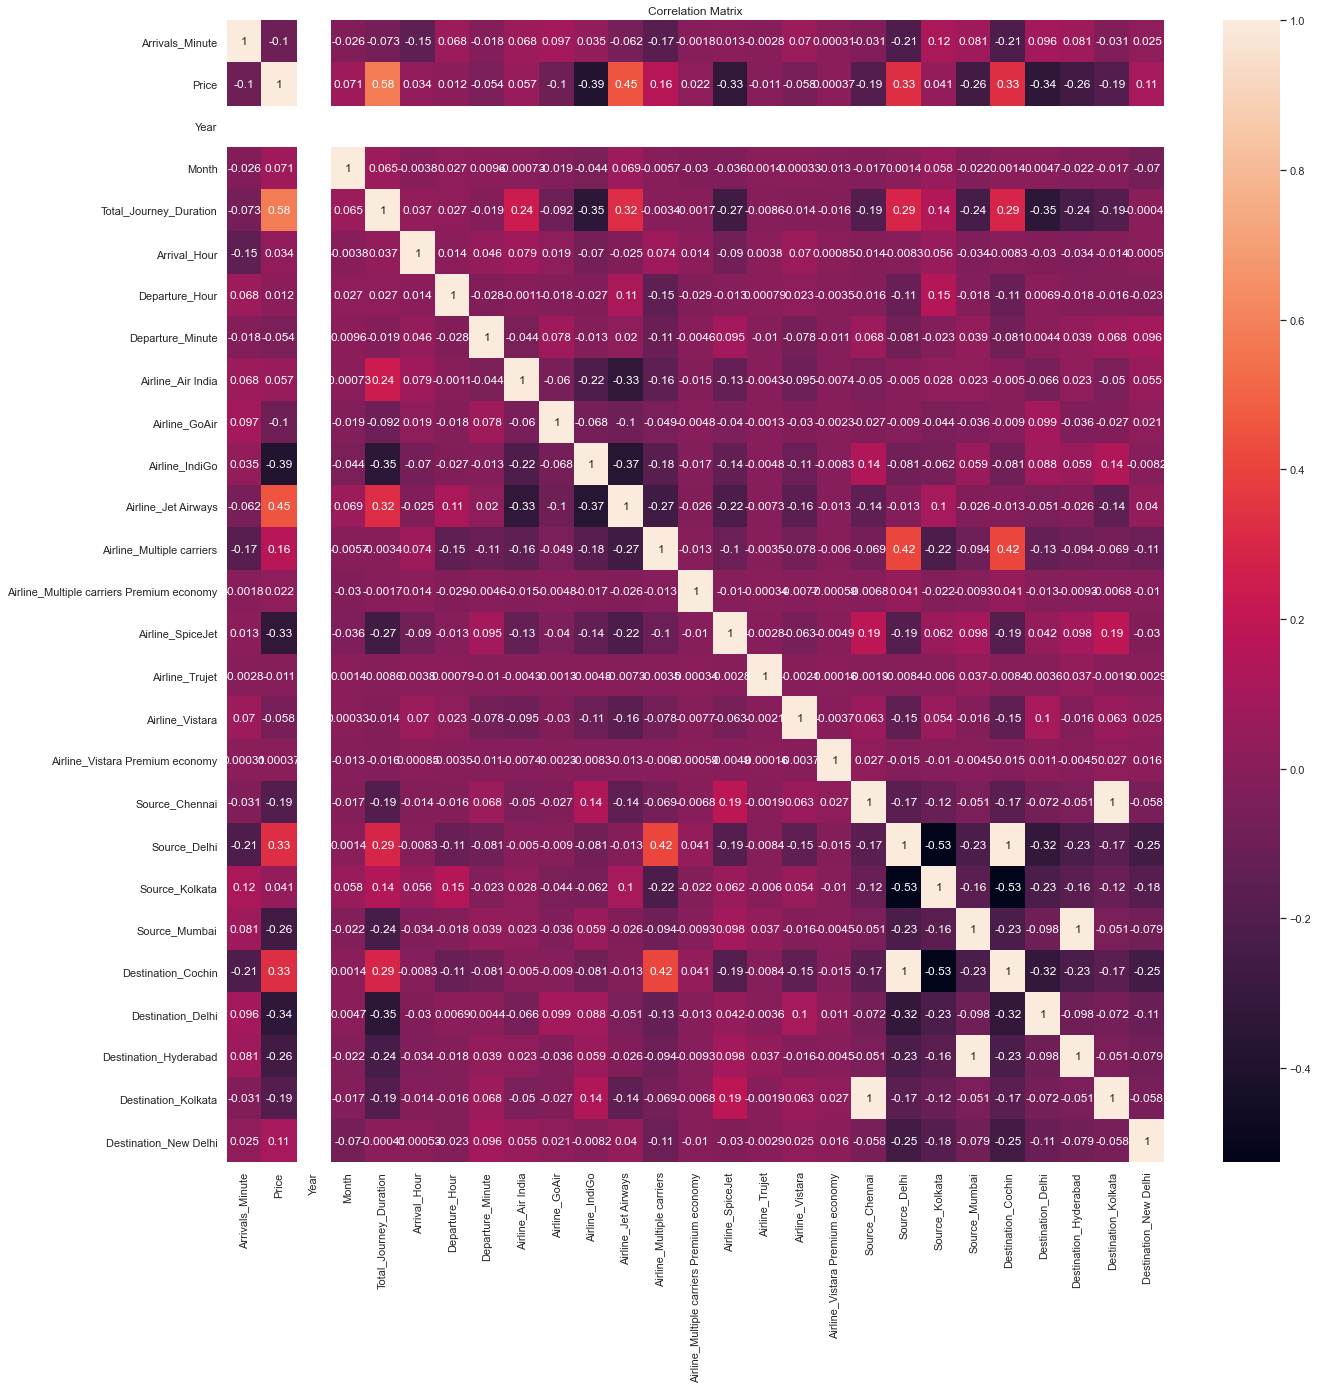

In [196]:
#lets plot the heatmap to check the correlation between dependent and independent variables.
corr_mat=df2.corr()
plt.figure(figsize=[21,21])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

We can see that there is a very good correlation between:
    Price & Total_Journey_Duration  which is 0.67
    Price & Total_Stops_nonstop which is -0.67

In [197]:
#We can see the correlations between the "Price " attribute and other attributes.
corr_matrix=df2.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price                                        1.000000
Total_Journey_Duration                       0.577097
Airline_Jet Airways                          0.453567
Destination_Cochin                           0.332087
Source_Delhi                                 0.332087
Airline_Multiple carriers                    0.164603
Destination_New Delhi                        0.105380
Month                                        0.071047
Airline_Air India                            0.057102
Source_Kolkata                               0.040674
Arrival_Hour                                 0.034300
Airline_Multiple carriers Premium economy    0.022024
Departure_Hour                               0.012360
Airline_Vistara Premium economy              0.000365
Airline_Trujet                              -0.011359
Departure_Minute                            -0.053995
Airline_Vistara                             -0.057943
Arrivals_Minute                             -0.100121
Airline_GoAir               

We can see that we have only one value throughout the dataset hence we can ignore year column

In [198]:
df_training=df2.drop(['Year'], axis = 1)

# Lets do the same things for test dataset

In [199]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [200]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [201]:
#Let us convert Date from object datatype to datetime64 Datatype
df_test["Date_of_Journey"]=pd.to_datetime(df_test["Date_of_Journey"])

In [202]:
#We are creating two new columns of Year and Month by extracting data from Date column
df_test['Year'] = pd.DatetimeIndex(df_test['Date_of_Journey']).year
df_test['Month'] = pd.DatetimeIndex(df_test['Date_of_Journey']).month

In [203]:
#Lets drop the column of Date_of_journey and Route.
df_test=df_test.drop(['Date_of_Journey'], axis = 1)
df_test=df_test.drop(['Route'], axis = 1)
df_test=df_test.drop(['Additional_Info'], axis = 1)


In [204]:
#Lets write a code which will convert the Duration time in minutes.
#Creating a empty list time in which we will store the the value of time both in hours and minutes.
time=[]
for i in df_test["Duration"]:
    x=i.split(" ")
    time.append(x)
    
#Lets create another two empty lists hours and minutes in which we will store the time in hours and in minute.
    
hours=[]
minutes=[]
for i in time:
    if len(i)==2:
        minutes.append(i[1])
    else:
        minutes.append("")
        
        
    hours.append(i[0])
    
#Create another empty lists in which we will store the time in integer.    
num_minute=[]
for i in minutes:
    if len(i)>1:
        num_minute.append(i[0:-1])
    else:
        num_minute.append(" ")
        
num_hours=[]
for i in hours:
   num_hours.append(i[0:-1])

#Lets convert the hours into minutes
hourss=[]
for i in num_hours:
    hourss.append(int(i)*60)
    
minutess=[]
for i in num_minute:
    if len(i)>1:
        minutess.append(int(i))
    else:
        minutess.append(0)
#Lets add time from both minutes and hours and convert it into minutes in empty list "total_time" .       
total_time=[]
for i in range(0, len(minutess)):
    total_time.append(minutess[i] + hourss[i])
  

In [205]:
total_time

[655,
 240,
 1425,
 780,
 170,
 1100,
 900,
 315,
 165,
 360,
 1735,
 560,
 615,
 280,
 1040,
 650,
 555,
 735,
 550,
 560,
 890,
 840,
 695,
 810,
 170,
 745,
 150,
 1530,
 1165,
 420,
 150,
 700,
 420,
 180,
 85,
 160,
 85,
 360,
 1020,
 640,
 150,
 750,
 90,
 1420,
 315,
 140,
 1415,
 90,
 1660,
 810,
 1700,
 345,
 1585,
 340,
 135,
 175,
 345,
 450,
 320,
 1550,
 795,
 1580,
 345,
 340,
 160,
 170,
 325,
 525,
 180,
 440,
 90,
 1270,
 960,
 470,
 90,
 180,
 170,
 1165,
 175,
 840,
 170,
 960,
 355,
 150,
 615,
 830,
 135,
 715,
 150,
 800,
 1090,
 1690,
 300,
 1395,
 75,
 80,
 805,
 375,
 80,
 610,
 275,
 660,
 470,
 740,
 150,
 910,
 90,
 1140,
 825,
 740,
 590,
 840,
 155,
 280,
 435,
 1380,
 625,
 300,
 1365,
 520,
 1660,
 690,
 155,
 165,
 315,
 940,
 150,
 155,
 560,
 170,
 520,
 320,
 345,
 150,
 165,
 475,
 1165,
 170,
 165,
 770,
 165,
 1525,
 620,
 510,
 180,
 765,
 180,
 150,
 730,
 1350,
 475,
 465,
 420,
 175,
 150,
 175,
 160,
 170,
 1315,
 90,
 180,
 390,
 180,
 155,


In [206]:
df_time = pd.DataFrame(total_time,columns=["Total_Journey_Duration"])

In [207]:
#Adding both the dataframes together. 
df_tr = pd.concat((df_test, df_time), axis=1)


In [208]:
#Lets delete the column whose name is "Duration" because it is of no use for us,since we have already created "Total_Journey_Duration".
df_tr=df_tr.drop(['Duration'], axis = 1)

In [209]:
#Checking for the null values in the dataframe.
df_tr.isnull().sum()

Airline                   0
Source                    0
Destination               0
Dep_Time                  0
Arrival_Time              0
Total_Stops               0
Year                      0
Month                     0
Total_Journey_Duration    0
dtype: int64

We do not have any null values present in our dataset.

In [210]:
#Lets extract the information of arrival time hour,min in integer form.
df_tr['Arrival_Hour'] = df_tr['Arrival_Time'].str.split(':').str[0]
df_tr['Arrival_Minute'] = df_tr['Arrival_Time'].str.split(':').str[1]
df_tr['Arrival_Hour']=df_tr['Arrival_Hour'].astype(int)
df_tr['Arrival_Minute']=df_tr['Arrival_Minute']
df_tr=df_tr.drop(['Arrival_Time'],axis=1)

In [211]:
Arrivals_Minute=[]
for i in df_tr["Arrival_Minute"]:
   Arrivals_Minute.append(i.split(" ")[0])
    

In [212]:
df_arrmin = pd.DataFrame(Arrivals_Minute,columns=["Arrivals_Minute"])

In [213]:
df_tr = pd.concat((df_arrmin, df_tr), axis=1)
df_tr=df_tr.drop(['Arrival_Minute'], axis = 1)
df_tr['Arrivals_Minute']=df_tr['Arrivals_Minute'].astype(int)

In [214]:
#Lets extract the information of Departure time hour,min in integer form.
df_tr['Departure_Hour'] = df_tr['Dep_Time'].str.split(':').str[0]
df_tr['Departure_Minute'] = df_tr['Dep_Time'].str.split(':').str[1]
df_tr['Departure_Hour']=df_tr['Departure_Hour'].astype(int)
df_tr['Departure_Minute']=df_tr['Departure_Minute'].astype(int)
df_tr=df_tr.drop(['Dep_Time'],axis=1)

In [215]:
df_tr

,Arrivals_Minute,Airline,Source,Destination,Total_Stops,Year,Month,Total_Journey_Duration,Arrival_Hour,Departure_Hour,Departure_Minute
0,25,Jet Airways,Delhi,Cochin,1 stop,2019,6,655,4,17,30
1,20,IndiGo,Kolkata,Banglore,1 stop,2019,12,240,10,6,20
2,0,Jet Airways,Delhi,Cochin,1 stop,2019,5,1425,19,19,15
3,0,Multiple carriers,Delhi,Cochin,1 stop,2019,5,780,21,8,0
4,45,Air Asia,Banglore,Delhi,non-stop,2019,6,170,2,23,55
...,...,...,...,...,...,...,...,...,...,...,...
2666,25,Air India,Kolkata,Banglore,1 stop,2019,6,1435,20,20,30
2667,55,IndiGo,Kolkata,Banglore,non-stop,2019,3,155,16,14,20
2668,25,Jet Airways,Delhi,Cochin,1 stop,2019,6,395,4,21,50
2669,15,Air India,Delhi,Cochin,1 stop,2019,6,915,19,4,0


In [216]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Arrivals_Minute         2671 non-null   int32 
 1   Airline                 2671 non-null   object
 2   Source                  2671 non-null   object
 3   Destination             2671 non-null   object
 4   Total_Stops             2671 non-null   object
 5   Year                    2671 non-null   int64 
 6   Month                   2671 non-null   int64 
 7   Total_Journey_Duration  2671 non-null   int64 
 8   Arrival_Hour            2671 non-null   int32 
 9   Departure_Hour          2671 non-null   int32 
 10  Departure_Minute        2671 non-null   int32 
dtypes: int32(4), int64(3), object(4)
memory usage: 187.9+ KB


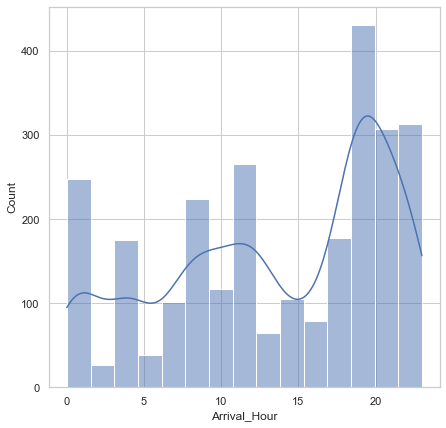

In [217]:
#Lets plot the Arrival_Hour  distribution curve.  
sns.histplot(data=df_tr, x="Arrival_Hour", kde=True)

We can see the Arrival_Hour is little skewed to the left.

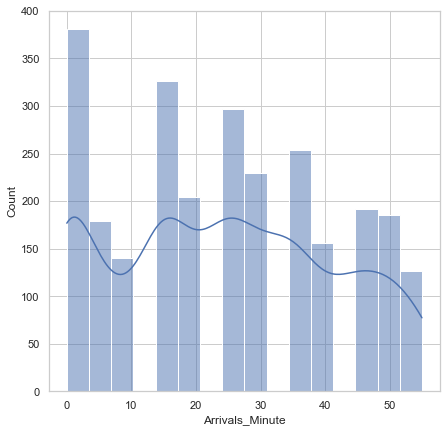

In [218]:
#Lets plot the Arrivals_Minute  distribution curve.  
sns.histplot(data=df_tr, x="Arrivals_Minute", kde=True)

We can see that Arrivals_Minute was very little skewed to the right.

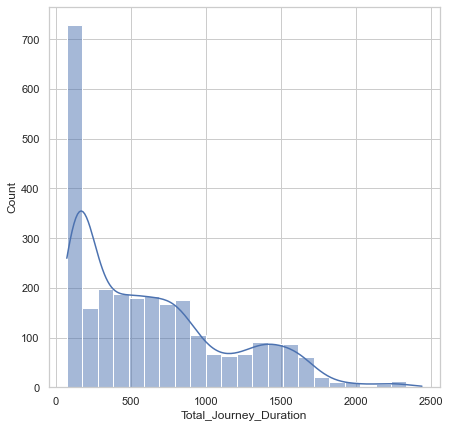

In [219]:
#Lets plot the Total_Journey_Duration  distribution curve.  
sns.histplot(data=df_tr, x="Total_Journey_Duration", kde=True)

We can see that "Total_Journey_Duration" is heavily skewed to the right side.

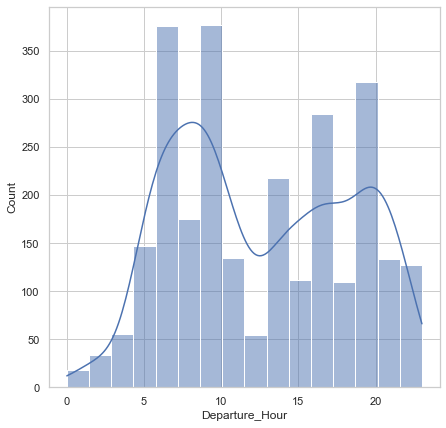

In [220]:
#Lets plot the Departure_Hour distribution curve.  
sns.histplot(data=df_tr, x="Departure_Hour", kde=True)

Almost there is no skewness present in the Departure_Hour.

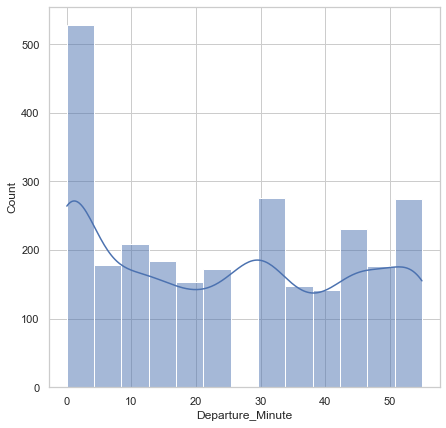

In [221]:
#Lets plot the Departure_Minute distribution curve.  
sns.histplot(data=df_tr, x="Departure_Minute", kde=True)

Almost there is no skewness present in the "Departure_Minute".

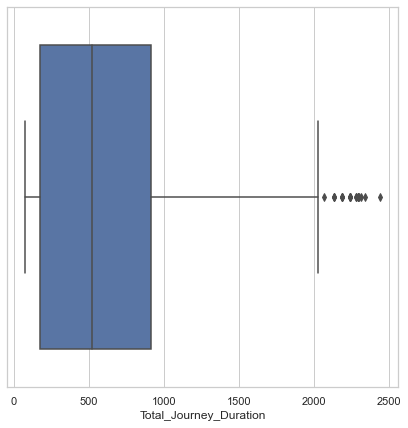

In [222]:
#Checking for the outliers by means of boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_tr["Total_Journey_Duration"])

We can see that there are few outliers present in the "Total_Journey_Duration".

In [223]:
#Lets check for the skewness present in the numerical columns
df_tr.skew()

Arrivals_Minute           0.115267
Year                      0.000000
Month                     0.590701
Total_Journey_Duration    0.897156
Arrival_Hour             -0.443166
Departure_Hour            0.093759
Departure_Minute          0.128515
dtype: float64

In [224]:
#using power transformers to reduce the skewness present in few columns.
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(df_tr.iloc[:,6:9])
df_tr.iloc[:,6:9]=pt.transform(df_tr.iloc[:,6:9])

In [225]:
df_tr.skew()

Arrivals_Minute           0.115267
Year                      0.000000
Month                    -0.032442
Total_Journey_Duration   -0.047636
Arrival_Hour             -0.408083
Departure_Hour            0.093759
Departure_Minute          0.128515
dtype: float64

In [226]:
#Creating dummy columns for the nominal categorical variables and dropping one column from each to reduce multicollinearity.
categorical_cols = ['Airline','Source','Destination'] 
df2 = pd.get_dummies(df_tr, columns = categorical_cols,drop_first=True)

In [227]:
df_testing=df2.drop(['Year'], axis = 1)

In [228]:
df_training

,Arrivals_Minute,Total_Stops,Price,Month,Total_Journey_Duration,Arrival_Hour,Departure_Hour,Departure_Minute,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,10,non-stop,3897,3,170,1,22,20,0,0,...,0,0,0,0,0,0,0,0,0,1
1,15,2 stops,7662,1,445,13,5,50,1,0,...,0,0,0,1,0,0,0,0,0,0
2,25,2 stops,13882,9,1140,4,9,25,0,0,...,0,0,1,0,0,1,0,0,0,0
3,30,1 stop,6218,12,325,23,18,5,0,0,...,0,0,0,1,0,0,0,0,0,0
4,35,1 stop,13302,1,285,21,16,50,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,25,non-stop,4107,9,150,22,19,55,0,0,...,0,0,0,1,0,0,0,0,0,0
10679,20,non-stop,4145,4,155,23,20,45,1,0,...,0,0,0,1,0,0,0,0,0,0
10680,20,non-stop,7229,4,180,11,8,20,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,10,non-stop,12648,1,160,14,11,30,0,0,...,0,0,0,0,0,0,0,0,0,1


In [229]:
#dfy_testing=pd.read_excel("Sample_submission.xlsx")

In [230]:
#df_testing=pd.concat([dfy_testing, df_testing], axis=1)
df_testing

,Arrivals_Minute,Total_Stops,Month,Total_Journey_Duration,Arrival_Hour,Departure_Hour,Departure_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,25,1 stop,0.261215,0.378586,-1.361817,17,30,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,20,1 stop,1.806275,-0.727070,-0.525790,6,20,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,1 stop,-0.064921,1.340993,0.769761,19,15,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,1 stop,-0.064921,0.586364,1.062125,8,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,45,non-stop,0.261215,-1.073932,-1.631447,23,55,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,25,1 stop,0.261215,1.350105,0.915774,20,30,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2667,55,non-stop,-0.828301,-1.164136,0.333918,14,20,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2668,25,1 stop,0.261215,-0.196762,-1.361817,21,50,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2669,15,1 stop,0.261215,0.780481,0.769761,4,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [231]:
#Defining a function which return the list of indices where outliers are present.
def outliers(dataframe,feature):
    Q1=dataframe[feature].quantile(0.25)
    Q3=dataframe[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    ls=dataframe.index[(dataframe[feature]<lower_bound) | (dataframe[feature]>upper_bound)]
    return ls

In [233]:
#Create an empty list to store the output indices from the multiple columns.

index_list=[]
for feature in ["Total_Journey_Duration"]:
    index_list.extend(outliers(df_testing,feature))

In [234]:
#Showing the index of those rows which have outliers.
index_list

[]

In [235]:
#define  a function called remove  which returns a cleaned dataframe without outliers
def remove(dataframe,index_list):
    index_list=sorted(set(index_list))
    dataframe=dataframe.drop(index_list)
    return dataframe

In [236]:
df_testing=remove(df_testing,index_list)

In [237]:
df_testing.columns

Index(['Arrivals_Minute', 'Total_Stops', 'Month', 'Total_Journey_Duration',
       'Arrival_Hour', 'Departure_Hour', 'Departure_Minute',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [238]:
df_testing=df_testing.drop(['Airline_Jet Airways Business'], axis = 1)

In [239]:
df_testing.columns

Index(['Arrivals_Minute', 'Total_Stops', 'Month', 'Total_Journey_Duration',
       'Arrival_Hour', 'Departure_Hour', 'Departure_Minute',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [240]:
df_testing = df_testing[['Arrivals_Minute', 'Total_Stops', 'Month', 'Total_Journey_Duration',
       'Arrival_Hour', 'Departure_Hour', 'Departure_Minute',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]

In [241]:
df_training = df_training[['Price', 'Arrivals_Minute', 'Total_Stops', 'Month', 'Total_Journey_Duration',
       'Arrival_Hour', 'Departure_Hour', 'Departure_Minute',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]

In [242]:
df_training.head(5)

,Price,Arrivals_Minute,Total_Stops,Month,Total_Journey_Duration,Arrival_Hour,Departure_Hour,Departure_Minute,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897,10,non-stop,3,170,1,22,20,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7662,15,2 stops,1,445,13,5,50,1,0,...,0,0,0,1,0,0,0,0,0,0
2,13882,25,2 stops,9,1140,4,9,25,0,0,...,0,0,1,0,0,1,0,0,0,0
3,6218,30,1 stop,12,325,23,18,5,0,0,...,0,0,0,1,0,0,0,0,0,0
4,13302,35,1 stop,1,285,21,16,50,0,0,...,0,0,0,0,0,0,0,0,0,1


In [243]:
df_testing.head(5)

,Arrivals_Minute,Total_Stops,Month,Total_Journey_Duration,Arrival_Hour,Departure_Hour,Departure_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,25,1 stop,0.261215,0.378586,-1.361817,17,30,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,20,1 stop,1.806275,-0.727070,-0.525790,6,20,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,1 stop,-0.064921,1.340993,0.769761,19,15,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,1 stop,-0.064921,0.586364,1.062125,8,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,45,non-stop,0.261215,-1.073932,-1.631447,23,55,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [244]:
#MAPPING THE CATEGORICAL VARIABLE WITH PROPER NUMERICAL ORDER.
df_testing=df_testing.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})
df_training=df_training.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [245]:
#Bifurcating the dataset into dependent and independent variables.
x=df_training.iloc[:,1:]
y=df_training.iloc[:,0]

In [246]:
#Standard Scaling the data.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = pd.DataFrame(sc.fit_transform(x),columns = x.columns)
df_testing = pd.DataFrame(sc.transform(df_testing),columns = df_testing.columns)


In [247]:
#Performing train test split on the dataset for model training.passing 20 % of data for model testing.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [248]:
#converting the independent variable y to numpy array .
y_train=y_train.to_numpy()
y_train=y_train.reshape(-1,1)

y_test=y_test.to_numpy()
y_test=y_test.reshape(-1,1)



In [249]:
#Importing different regression metrics and machine learning algorithms.
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [250]:
#DecisionTreeRegressor model
dtr=DecisionTreeRegressor()

dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.6525033947823333
5934016.922358092


In [251]:
#knearest Neighbours regressor model
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.6926515704981014
5248427.623003802


In [252]:
#AdaBoost Regressor model
abr=AdaBoostRegressor()

abr.fit(x_train,y_train)
y_pred=abr.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.5399509025852319
7856016.68673801


In [253]:
#Linear Regression model
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.6291999214929218
6331958.090049411


In [254]:
#Gradient boosting model
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7194072705117789
4791534.593642414


In [255]:
#Support vector Regressor model
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.09412480593160644
15469154.663479801


In [256]:
#RandomForest Regressor model
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

<ipython-input-256-70210919df31>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)


0.7264595308448647
4671106.849805338


In [257]:
#To check model overfitting we are performing the cross validation.
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of LinearRegression model :",scr.mean())
scr=cross_val_score(gbr,x,y,cv=5)
print("Cross validation score of gradientBoostingRegression model :",scr.mean())
scr=cross_val_score(svr,x,y,cv=5)
print("Cross validation score of Support vector regression model :",scr.mean())
scr=cross_val_score(abr,x,y,cv=5)
print("Cross validation score of AdaBoostRegressor model :",scr.mean())
scr=cross_val_score(knr,x,y,cv=5)
print("Cross validation score of Knearest neighbour regressor model :",scr.mean())
scr=cross_val_score(dtr,x,y,cv=5)
print("Cross validation score of DecisionTreeRegressor model :",scr.mean())
scr=cross_val_score(rfr,x,y,cv=5)
print("Cross validation score of RandomForestRegressor model :",scr.mean())

Cross validation score of LinearRegression model : 0.6257591754173953
Cross validation score of gradientBoostingRegression model : 0.7087510473866343
Cross validation score of Support vector regression model : 0.09514706137439863
Cross validation score of AdaBoostRegressor model : 0.5478099243127781
Cross validation score of Knearest neighbour regressor model : 0.6868092684283316
Cross validation score of DecisionTreeRegressor model : 0.6452876013485268
Cross validation score of RandomForestRegressor model : 0.7194231277870544


Our best performing model is RandomForestRegressor.

# Lets do the hyperparameter tuning.

In [258]:
from sklearn.model_selection import GridSearchCV

In [259]:
parameter={ "criterion":['mse', 'mae'],}

In [260]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)
GCV.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae']})

In [261]:
GCV.best_params_

{'criterion': 'mae'}

In [262]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [263]:
r2_score(y_test,GCV_pred)

0.7362306704460643

In [264]:
submission_results=GCV.best_estimator_.predict(df_testing)

In [265]:
submission_results

array([5127.75 , 6113.25 , 5639.335, ..., 4631.93 , 6469.64 , 4387.735])

In [268]:
df = pd.DataFrame(data =submission_results,columns=["Predicted_Price"])
  

In [269]:
df

,Predicted_Price
0,5127.750
1,6113.250
2,5639.335
3,5682.630
4,5117.885
...,...
2666,6082.280
2667,5037.730
2668,4631.930
2669,6469.640


Above column is our predicted_price for flights.